In [12]:
import numpy as np
import pandas as pd

# Load the dataset
ratings = pd.read_csv('data/goodbooks-10k-data/ratings.csv')
books = pd.read_csv('data/goodbooks-10k-data/books.csv')

display(ratings.head())
display(books.head())

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [13]:
# book info
book_count = books.shape[0]
ratings_on_books = books['ratings_count'].sum()
most_ratings = books.iloc[books['ratings_count'].idxmax()]
fewest_ratings = books.iloc[books['ratings_count'].idxmin()]

highest_average_rating = books.iloc[books['average_rating'].idxmax()]
lowest_average_rating = books.iloc[books['average_rating'].idxmin()]

most_5_star_ratings = books.iloc[books['ratings_5'].idxmax()]
most_1_star_ratings = books.iloc[books['ratings_1'].idxmax()]

print('Total number of books in dataset: %s' % "{:,}".format(book_count))
print('Total number of ratings on books in dataset: %s' % "{:,}".format(ratings_on_books))
print('Book with most ratings: %s with %s ratings' % (most_ratings['title'], "{:,}".format(most_ratings['ratings_count'])))
print('Book with fewest ratings: %s with %s ratings' % (fewest_ratings['title'], "{:,}".format(fewest_ratings['ratings_count'])))
print('Book with highest average rating: %s with %s average' % (highest_average_rating['title'], highest_average_rating['average_rating']))
print('Book with lowest average rating: %s with %s average' % (lowest_average_rating['title'], lowest_average_rating['average_rating']))
print('Book with most 5-star ratings: %s with %s 5-star ratings' % (most_5_star_ratings['title'], "{:,}".format(most_5_star_ratings['ratings_5'])))
print('Book with most 1-star ratings: %s with %s 1-star ratings' % (most_1_star_ratings['title'], "{:,}".format(most_1_star_ratings['ratings_1'])))

Total number of books in dataset: 10,000
Total number of ratings on books in dataset: 540,012,351
Book with most ratings: The Hunger Games (The Hunger Games, #1) with 4,780,653 ratings
Book with fewest ratings: درخت زیبای من with 2,716 ratings
Book with highest average rating: The Complete Calvin and Hobbes with 4.82 average
Book with lowest average rating: One Night at the Call Center with 2.47 average
Book with most 5-star ratings: Harry Potter and the Sorcerer's Stone (Harry Potter, #1) with 3,011,543 5-star ratings
Book with most 1-star ratings: Twilight (Twilight, #1) with 456,191 1-star ratings


In [14]:
# ratings info
rating_count = ratings.shape[0]
percent_of_total = (rating_count / ratings_on_books) * 100

mean_rating = ratings['rating'].mean()
median_rating = ratings['rating'].median()

user_count = ratings['user_id'].nunique()
ratings_per_user = rating_count / user_count

print('Total number of ratings in dataset: %s' % "{:,}".format(rating_count))
print('Percent of total ratings included in this dataset: %s percent' % round(percent_of_total, 2))
print('Mean rating: %s' % round(mean_rating, 2))
print('Median rating: %s' % median_rating)
print('Total number of users in dataset: %s' % "{:,}".format(user_count))
print('Ratings per user: %s' % round(ratings_per_user, 2))

Total number of ratings in dataset: 5,976,479
Percent of total ratings included in this dataset: 1.11 percent
Mean rating: 3.92
Median rating: 4.0
Total number of users in dataset: 53,424
Ratings per user: 111.87


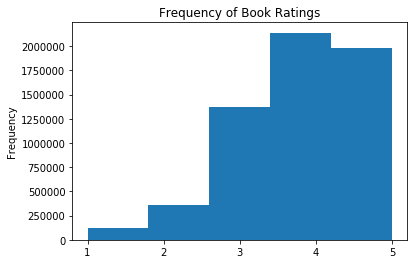

In [15]:
# Create a histogram of the ratings
ratings['rating'].plot(kind='hist', bins=5, xticks=[1,2,3,4,5], title='Frequency of Book Ratings')

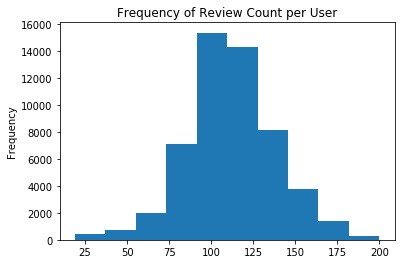

In [17]:
# Create a histogram of rating count per user
ratings['user_id'].value_counts().plot(kind='hist', title='Frequency of Review Count per User')

In [18]:
# Merge the two tables then pivot so we have Users X Books dataframe. 
ratings_title = pd.merge(ratings, books[['book_id', 'title']], on='book_id' )
user_book_ratings = pd.pivot_table(ratings_title, index='user_id', columns= 'title', values='rating')

print('dataset dimensions: ', user_book_ratings.shape, '\n\nSubset example:')
user_book_ratings.iloc[:25, :10]

dataset dimensions:  (53424, 9964) 

Subset example:


title,"Angels (Walsh Family, #3)","""حكايات فرغلي المستكاوي ""حكايتى مع كفر السحلاوية",#GIRLBOSS,'Salem's Lot,"'Tis (Frank McCourt, #2)","1,000 Places to See Before You Die",1/4 جرام,"10% Happier: How I Tamed the Voice in My Head, Reduced Stress Without Losing My Edge, and Found Self-Help That Actually Works","100 Bullets, Vol. 1: First Shot, Last Call",100 Love Sonnets
user_id,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Drop books that have fewer than 300 ratings.
user_book_ratings = user_book_ratings.dropna(axis='columns', thresh=300)
# Drop users that have given fewer than 100 ratings of these most-rated books
user_book_ratings = user_book_ratings.dropna(thresh=100)

print('dataset dimensions: ', user_book_ratings.shape, '\n\nSubset example:')
user_book_ratings.iloc[:25, :10]

dataset dimensions:  (21093, 4167) 

Subset example:


title,'Salem's Lot,"'Tis (Frank McCourt, #2)","1,000 Places to See Before You Die",100 Selected Poems,"10th Anniversary (Women's Murder Club, #10)",11/22/63,"11th Hour (Women's Murder Club, #11)","12th of Never (Women's Murder Club, #12)","13 Little Blue Envelopes (Little Blue Envelope, #1)",1491: New Revelations of the Americas Before Columbus
user_id,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
from sklearn.decomposition import TruncatedSVD

# replace NaN's with zeroes for Truncated SVD
user_book_ratings_without_nan = user_book_ratings.fillna(0)

tsvd = TruncatedSVD(n_components=200, random_state=42)
user_book_ratings_tsvd = tsvd.fit(user_book_ratings_without_nan).transform(user_book_ratings_without_nan)

print('Original number of features:', user_book_ratings_without_nan.shape[1])
print('Reduced number of features:', user_book_ratings_tsvd.shape[1])
print('Explained variance ratio:', tsvd.explained_variance_ratio_[0:200].sum())

Original number of features: 4167
Reduced number of features: 200
Explained variance ratio: 0.4578238713607182


In [21]:
# view result in a Pandas dataframe, applying the original indices
indices = user_book_ratings.index

book_ratings_for_clustering = pd.DataFrame(data=user_book_ratings_tsvd).set_index(indices)
print('dataset dimensions: ', book_ratings_for_clustering.shape, '\n\nSubset example:')

book_ratings_for_clustering.iloc[:25, :10]

dataset dimensions:  (21093, 200) 

Subset example:


,0,1,2,3,4,5,6,7,8,9
user_id,,,,,,,,,,
1,15.890624,12.220122,1.925016,1.409163,-4.145488,-0.191061,-2.172195,1.114718,0.005334,-3.539271
4,23.520890,-3.361183,6.632460,-2.472390,-1.881259,-6.729464,-3.630784,-3.544545,-5.351490,4.873452
7,10.689776,-7.137688,7.228139,5.136675,-4.515555,4.123648,-1.091927,-2.580533,-3.603671,0.564154
9,17.908101,3.201081,-2.745554,0.785079,-5.958210,-8.779004,-0.560748,-0.923265,-4.500548,-0.840713
10,15.556781,8.111153,1.614511,2.272684,-6.314662,-0.778649,-1.414877,-0.052674,1.193868,-2.328450
11,12.512671,10.385705,2.178778,2.242270,-5.124450,-2.355055,-1.358577,-3.733862,-5.442580,-0.636502
12,14.229241,11.352930,0.963072,3.893927,-0.673727,-0.245150,-4.476005,5.060853,-4.928269,1.066792
24,15.927688,7.027858,0.262915,-0.228713,-4.622876,-7.963217,-3.747963,1.274980,-1.894668,-2.887739
28,15.798722,8.937375,0.427413,0.851263,-1.957955,-0.432745,0.888588,-4.936435,-6.826052,3.063113


In [22]:
from sklearn.model_selection import train_test_split
book_ratings_training, book_ratings_testing = train_test_split(book_ratings_for_clustering, test_size=0.20, random_state=42)

print('Training data shape: ', book_ratings_training.shape)
print('Testing data shape: ', book_ratings_testing.shape)

Training data shape:  (16874, 200)
Testing data shape:  (4219, 200)


In [27]:
# find the per-book ratings of the test set
indices = book_ratings_testing.index
test_set_ratings = user_book_ratings.loc[indices]
test_set_ratings.head()

title,'Salem's Lot,"'Tis (Frank McCourt, #2)","1,000 Places to See Before You Die",100 Selected Poems,"10th Anniversary (Women's Murder Club, #10)",11/22/63,"11th Hour (Women's Murder Club, #11)","12th of Never (Women's Murder Club, #12)","13 Little Blue Envelopes (Little Blue Envelope, #1)",1491: New Revelations of the Americas Before Columbus,...,Zodiac,Zoo,god is Not Great: How Religion Poisons Everything,الأسود يليق بك,الفيل الأزرق,تراب الماس,ساق البامبو,عزازيل,هيبتا,يوتوبيا
user_id,,,,,,,,,,,,,,,,,,,,,
13361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30375,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
mean_ratings_for_random_10 = []

# for each user, pick 10 books at random that the reader has rated and get the reader's average score for those books
for index, row in test_set_ratings.iterrows():
    ratings_without_nas = row.dropna()
    random_10 = ratings_without_nas.sample(n=10)
    random_10_mean = random_10.mean()
    mean_ratings_for_random_10.append(random_10_mean)

# get the mean of the users' mean ratings for 10 random books each    
mean_benchmark_rating = sum(mean_ratings_for_random_10) / len(mean_ratings_for_random_10)

print('Mean rating for 10 random books per test user: ', mean_benchmark_rating)

Mean rating for 10 random books per test user:  3.8926404361223046


In [29]:
from sklearn.cluster import KMeans

clusterer_KMeans = KMeans(n_clusters=7).fit(book_ratings_training)
preds_KMeans = clusterer_KMeans.predict(book_ratings_training)

from sklearn.metrics import silhouette_score
kmeans_score = silhouette_score(book_ratings_training, preds_KMeans)
print(kmeans_score)


0.044679095430892386


In [30]:
# trying with the training data after preprocessing 
from sklearn.mixture import GaussianMixture

clusterer_GMM = GaussianMixture(n_components=25).fit(book_ratings_training)
preds_GMM = clusterer_GMM.predict(book_ratings_training)

GMM_score = silhouette_score(book_ratings_training, preds_GMM)
print(GMM_score)

0.008576036661992654


In [31]:
indices = book_ratings_training.index
preds = pd.DataFrame(data=preds_KMeans, columns=['cluster']).set_index(indices)
preds.head()

,cluster
user_id,
41190,6
12423,2
50999,3
18685,1
36751,0


In [34]:
# get a list of the highest-rated books for each cluster
def get_cluster_favorites(cluster_number):
    # create a list of cluster members
    cluster_membership = preds.index[preds['cluster'] == cluster_number].tolist()
    # build a dataframe of that cluster's book ratings
    cluster_ratings = user_book_ratings.loc[cluster_membership]
    # drop books that have fewer than 10 ratings by cluster members
    cluster_ratings = cluster_ratings.dropna(axis='columns', thresh=10)
    # find the cluster's mean rating overal and for each book
    means = cluster_ratings.mean(axis=0)
    # sort books by mean rating
    favorites = means.sort_values(ascending=False)
    return favorites

# for each cluster, determine the overall mean rating cluster members have given books
def get_cluster_mean(cluster_number):
    # create a list of cluster members
    cluster_membership = preds.index[preds['cluster'] == cluster_number].tolist()
    # create a version of the original ratings dataset that only includes cluster members
    cluster_ratings = ratings[ratings['user_id'].isin(cluster_membership)]
    # get the mean rating
    return cluster_ratings['rating'].mean()

In [35]:
cluster0_books_storted = get_cluster_favorites(0)
cluster0_mean = get_cluster_mean(0)

print('The cluster 0 mean is:', cluster0_mean)
cluster0_books_storted[0:10]

The cluster 0 mean is: 3.901774488740352


title
The Complete Calvin and Hobbes                                   4.925000
The Calvin and Hobbes Tenth Anniversary Book                     4.868421
Saga, Vol. 2 (Saga, #2)                                          4.800000
It's a Magical World: A Calvin and Hobbes Collection             4.739130
Saga, Vol. 1 (Saga, #1)                                          4.714286
Words of Radiance (The Stormlight Archive, #2)                   4.707657
Calvin and Hobbes                                                4.706522
The Essential Calvin and Hobbes: A Calvin and Hobbes Treasury    4.688312
The Kindly Ones (The Sandman #9)                                 4.670455
The Stand: Soul Survivors                                        4.642857
dtype: float64

In [36]:
cluster1_books_storted = get_cluster_favorites(1)
cluster1_mean = get_cluster_mean(1)

print('The cluster 1 mean is:', cluster1_mean)
cluster1_books_storted[0:10]

The cluster 1 mean is: 3.857402713582824


title
It's a Magical World: A Calvin and Hobbes Collection             4.868421
The Complete Calvin and Hobbes                                   4.790323
Saga, Vol. 3 (Saga, #3)                                          4.785714
Saga, Vol. 2 (Saga, #2)                                          4.769231
The Calvin and Hobbes Tenth Anniversary Book                     4.750000
A Game of Thrones: The Graphic Novel, Vol. 1                     4.733333
Shadowfever (Fever, #5)                                          4.727273
The Essential Calvin and Hobbes: A Calvin and Hobbes Treasury    4.726619
The Constitution of the United States of America                 4.725490
The Wake (The Sandman #10)                                       4.696429
dtype: float64

In [43]:
cluster2_books_storted = get_cluster_favorites(2)
cluster2_mean = get_cluster_mean(2)

print('The cluster 2 mean is:', cluster2_mean)
cluster2_books_storted[0:10]

The cluster 2 mean is: 3.815560096266546


title
The Book of Mormon: Another Testament of Jesus Christ    5.000000
Holy Bible: New International Version                    4.857143
Fruits Basket, Vol. 1                                    4.800000
Words of Radiance (The Stormlight Archive, #2)           4.800000
The Cat in the Hat and Other Dr. Seuss Favorites         4.789474
Complete Poems, 1904-1962                                4.750000
The Paper Bag Princess                                   4.750000
Saga, Vol. 2 (Saga, #2)                                  4.750000
The Harry Potter Collection 1-4 (Harry Potter, #1-4)     4.733333
The Complete Poems of Emily Dickinson                    4.714286
dtype: float64

In [44]:
cluster3_books_storted = get_cluster_favorites(3)
cluster3_mean = get_cluster_mean(3)

print('The cluster 3 mean is:', cluster3_mean)
cluster3_books_storted[0:10]

The cluster 3 mean is: 3.9266702414535395


title
Bloodfever (Fever, #2)                                           4.800000
The Complete Calvin and Hobbes                                   4.764706
It's a Magical World: A Calvin and Hobbes Collection             4.750000
The Calvin and Hobbes Tenth Anniversary Book                     4.727273
Beyond the Highland Mist (Highlander, #1)                        4.727273
The Complete Novels                                              4.722222
The Harry Potter Collection 1-4 (Harry Potter, #1-4)             4.708333
The Secret (Highlands' Lairds #1)                                4.666667
The Hitchhiker's Guide to the Galaxy: A Trilogy in Four Parts    4.666667
A Voice in the Wind (Mark of the Lion, #1)                       4.655172
dtype: float64

In [37]:
cluster4_books_storted = get_cluster_favorites(4)
cluster4_mean = get_cluster_mean(4)

print('The cluster 4 mean is:', cluster4_mean)
cluster4_books_storted[0:10]

The cluster 4 mean is: 3.960811444652908


title
The Complete Calvin and Hobbes                                   4.833333
Dreamfever (Fever, #4)                                           4.800000
Faefever (Fever, #3)                                             4.800000
The Case for Christ                                              4.800000
Worlds' End (The Sandman #8)                                     4.777778
The Wake (The Sandman #10)                                       4.769231
The Kindly Ones (The Sandman #9)                                 4.769231
The Hitchhiker's Guide to the Galaxy: A Trilogy in Four Parts    4.769231
The Far Side Gallery                                             4.764706
Brief Lives (The Sandman #7)                                     4.750000
dtype: float64

In [45]:
cluster5_books_storted = get_cluster_favorites(5)
cluster5_mean = get_cluster_mean(5)

print('The cluster 5 mean is:', cluster5_mean)
cluster5_books_storted[0:10]

The cluster 5 mean is: 3.92097768611361


title
Guess How Much I Love You                                                                         4.833333
Harry Potter Boxset (Harry Potter, #1-7)                                                          4.827586
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics    4.800000
Harry Potter and the Deathly Hallows (Harry Potter, #7)                                           4.762747
The Harry Potter Collection 1-4 (Harry Potter, #1-4)                                              4.750000
A Court of Mist and Fury (A Court of Thorns and Roses, #2)                                        4.750000
Words of Radiance (The Stormlight Archive, #2)                                                    4.736842
Schindler's List                                                                                  4.727273
Acheron (Dark-Hunter #14)                                                                         4.718750
Talking to Dragons (Enchanted F

In [46]:
cluster6_books_storted = get_cluster_favorites(6)
cluster6_mean = get_cluster_mean(6)

print('The cluster 6 mean is:', cluster6_mean)
cluster6_books_storted[0:10]

The cluster 6 mean is: 3.88042356156065


title
The Harry Potter Collection 1-4 (Harry Potter, #1-4)    4.820513
Fool's Fate (Tawny Man, #3)                             4.785714
The Kindly Ones (The Sandman #9)                        4.785714
Brief Lives (The Sandman #7)                            4.785714
It's a Magical World: A Calvin and Hobbes Collection    4.777778
Fables and Reflections (The Sandman #6)                 4.774194
Harry Potter Boxset (Harry Potter, #1-7)                4.771812
Nothing to Envy: Ordinary Lives in North Korea          4.769231
Worlds' End (The Sandman #8)                            4.766667
A Game of You (The Sandman #5)                          4.733333
dtype: float64

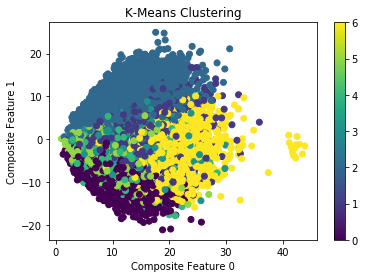

In [47]:
import matplotlib.pyplot as plt 

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(book_ratings_training[0],book_ratings_training[1],c=preds_KMeans)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Composite Feature 0')
ax.set_ylabel('Composite Feature 1')
plt.colorbar(scatter)

In [48]:
# associate each test user with a cluster
test_set_preds = clusterer_KMeans.predict(book_ratings_testing)

test_set_indices = book_ratings_testing.index
test_set_clusters = pd.DataFrame(data=test_set_preds, columns=['cluster']).set_index(test_set_indices)
test_set_clusters.head()

,cluster
user_id,
13361,6
4326,6
31159,0
10579,1
30375,2


In [49]:
mean_ratings_for_cluster_favorites = []

# put each cluster's sorted book list in an array to reference
cluster_favorites = [cluster0_books_storted, cluster1_books_storted, cluster2_books_storted, cluster3_books_storted, cluster4_books_storted, cluster5_books_storted, cluster6_books_storted]

# for each user, find the 10 books the reader has rated that are the top-rated books of the cluster. 
# get the reader's average score for those books
for index, row in test_set_ratings.iterrows():
    user_cluster = test_set_clusters.loc[index, 'cluster']
    favorites = cluster_favorites[user_cluster].index
    user_ratings_of_favorites = []
    # proceed in order down the cluster's list of favorite books
    for book in favorites:
        # if the user has given the book a rating, save the rating to a list
        if np.isnan(row[book]) == False:
            user_ratings_of_favorites.append(row[book])
        # stop when there are 10 ratings for the user
        if len(user_ratings_of_favorites) >= 10:
            break
    # get the mean for the user's rating of the cluster's 10 favorite books
    mean_rating_for_favorites = sum(user_ratings_of_favorites) / len(user_ratings_of_favorites)
    mean_ratings_for_cluster_favorites.append(mean_rating_for_favorites)
    
mean_favorites_rating = sum(mean_ratings_for_cluster_favorites) / len(mean_ratings_for_cluster_favorites)

print('Mean rating for 10 random books per test user: ', mean_benchmark_rating)
print('Mean rarting for 10 books that are the cluster\'s favorites: ', mean_favorites_rating)
print('Difference between ratings: ', mean_favorites_rating-mean_benchmark_rating)

Mean rating for 10 random books per test user:  3.8926404361223046
Mean rarting for 10 books that are the cluster's favorites:  4.359540175396995
Difference between ratings:  0.4668997392746901


In [50]:
def recommend(cluster_assignments, ratings_matrix, user_id):
    user_cluster = cluster_assignments.loc[user_id, 'cluster']
    favorites = get_cluster_favorites(user_cluster).index
    for book in favorites:
        # check if the user's rating for the book is NaN. 
        #If so, recommend the book. Otherwise, the user has already read this book, so move on
        if np.isnan(ratings_matrix.loc[user_id, book]):
            return book
    return null

recommendation13361 = recommend(test_set_clusters, user_book_ratings, 13361)
recommendation31159 = recommend(test_set_clusters, user_book_ratings, 31159)
recommendation10579 = recommend(test_set_clusters, user_book_ratings, 10579)
recommendation30375 = recommend(test_set_clusters, user_book_ratings, 30375)

print('Recommendation for user 13361: ', recommendation13361)
print('Recommendation for user 31159: ', recommendation31159)
print('Recommendation for user 10579: ', recommendation10579)
print('Recommendation for user 30375: ', recommendation30375)

Recommendation for user 13361:  The Harry Potter Collection 1-4 (Harry Potter, #1-4)
Recommendation for user 31159:  The Complete Calvin and Hobbes
Recommendation for user 10579:  It's a Magical World: A Calvin and Hobbes Collection
Recommendation for user 30375:  The Book of Mormon: Another Testament of Jesus Christ
